In [1]:
"""
Name: con_distributions.ipynb
Authors: Stephan Meighen-Berger
Plots and stores the standard distributions
"""
%load_ext autoreload
%autoreload 2

In [2]:
 # General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import csv
from scipy.stats import gamma

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from contagion import Contagion, config

In [6]:
# Options
# General
config['general']['trace spread'] = True
# Population
config['population']['population size'] = 100
config['population']['social circle pdf']["mean"] = 40
config['population']['social circle interactions pdf']["mean"] = 18
config["population"]['population class'] = 'HomogeneousPopulation'
# HomogeneousPopulation AccuratePopulation
# Infection
config['infection']['infected'] = 1
config['infection']['infection probability pdf']['mean'] = 3.
config['infection']['infection probability pdf']['sd'] = 2.42
config['infection']['infection probability pdf']['max_val'] = 0.15
config['infection']["latency duration pdf"]['class'] = "Gamma_Benchmark"
config['infection']["latency duration pdf"]['shape'] = 3.93
config['infection']["latency duration pdf"]['loc'] = -4.
config['infection']["latency duration pdf"]['scale'] = 2.154
config['infection']["incubation duration pdf"]['mean'] = 3.0 # 7.46522
config['infection']["incubation duration pdf"]['sd'] = 0.01 # 4.270138625384426
config['infection']["infectious duration pdf"]['mean'] = 2.
config['infection']["infectious duration pdf"]['sd'] = 0.2
config['infection']["hospitalization probability pdf"]['mean'] = 0.5
config['infection']["hospitalization probability pdf"]['sd'] = 0.01

In [7]:
# Importing data
infec_prob = []
with open("../data/benchmarks/Infec_Prob.txt", "r") as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        infec_prob.append([float(row[0]), float(row[1])])
infec_prob = np.array(infec_prob)
incuba = []
with open("../data/benchmarks/Latent.txt", "r") as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        incuba.append([float(row[0]), float(row[1])])
incuba = np.array(incuba)

In [8]:
# Creating a contagion object
contagion = Contagion()

In [9]:
# Infection probability
infect_prob = contagion.infection.pdf_infection_prob
# The latent distribution
latent_distr = contagion.infection.latent_duration
# The incubation distribution
incuba_distr = contagion.infection.incubation_duration
# The infectious distribution
infect_distr = contagion.infection.infectious_duration

In [10]:
benchi = np.array([0.0418147,
0.0855887,
0.104606,
0.114837,
0.108092,
0.103005,
0.0927453,
0.0758805,
0.0635615,
0.0543948,
0.0414095,
0.030878,
0.0225029,
0.0176491,
0.0129959,
0.00811712,
0.00729323,
0.00482511,
0.00355347,
0.00224957,
0.000773728,
0.00120003,
0.000601788,
0.000257909,
0.000429849,
8.60E-05,
8.60E-05,
0.000171939,
0,
0.000394041,
0])

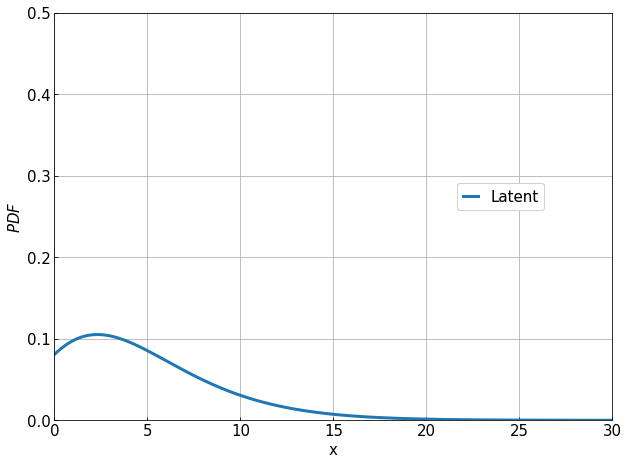

In [14]:
# Plotting standards
std_size = 10.
fontsize = 15.
lw=3.
h_length=1.
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
# ---------------------------------------------------------------------------------
# The range
x = np.linspace(0., 100., 1000)
# ---------------------------------------------------------------------------------
# Infection probability
# ax1.plot(x, infect_prob.pdf(x),
#          lw=lw, label='Infection Prob.')
# ax1.scatter(2. + infec_prob[:, 0], infec_prob[:, 1],
#             lw=lw, label='Benchmark Infec Prob.')
# Latent
ax1.plot(x, latent_distr.pdf(x),
         lw=lw, label='Latent')
# Incubation period
# ax1.plot(x, incuba_distr.pdf(x),
#          lw=lw, label='Incubation')
# ax1.scatter(incuba[:, 0], incuba[:, 1],
#             lw=lw, label='Benchmark Incubation')
# REsults infectiouness * probabilty to still be infectious
# ax1.scatter(range(len(benchi)), benchi, lw=lw, label='Benchi')
# ax1.plot(x, (infect_prob.pdf(x) * incuba_distr.pdf(x)) / max((infect_prob.pdf(x) * incuba_distr.pdf(x))) * max(benchi))
ax1.set_xlim(0, 30)
ax1.set_ylim(0., 0.5)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'x', fontsize=fontsize)
ax1.set_ylabel(r'$PDF$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.8, +0.6),
                  ncol=1, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=True)
ax1.add_artist(lgd1)
ax1.grid(True)
plt.show()

In [15]:
figure.savefig(PICS + "Contagion_Distributions.png",
               bbox_inches='tight')